In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [8]:
df = pd.read_csv(r'D:\vscode\nyc_building_energy_efficiency_ratings\nyc_energy_rating\data\raw\energy_disclosure_2021_rows.csv')
df2 = pd.read_csv(r'D:\vscode\nyc_building_energy_efficiency_ratings\nyc_energy_rating\data\raw\geojson_lookup_rows.csv')
df.head()

,10_Digit_BBL,Street_Number,Street_Name,DOF_Gross_Square_Footage,Energy_Efficiency_Grade,Energy_Star_1-100_Score
0,1007610020,325,WEST 37 STREET,48843,A,100
1,1007610022,313,WEST 37 STREET,82354,C,62
2,1007610028,307,WEST 37 STREET,102824,B,79
3,1007610033,545,8 AVENUE,166874,A,86
4,1007610037,555,8 AVENUE,162260,A,100


In [9]:
print("energy_disclosure_data nan values\n1",df.isna().sum())
print("****************************")
print("geojson_lookup_data nan values\n1",df.isna().sum())

energy_disclosure_data nan values
1 10_Digit_BBL                0
Street_Number               0
Street_Name                 0
DOF_Gross_Square_Footage    0
Energy_Efficiency_Grade     0
Energy_Star_1-100_Score     0
dtype: int64
****************************
geojson_lookup_data nan values
1 10_Digit_BBL                0
Street_Number               0
Street_Name                 0
DOF_Gross_Square_Footage    0
Energy_Efficiency_Grade     0
Energy_Star_1-100_Score     0
dtype: int64


In [10]:
# Merge datasets based on a common key
merged_data = pd.merge(df, df2, how='left', on='10_Digit_BBL')

In [11]:
merged_data.head()

,10_Digit_BBL,Street_Number,Street_Name,DOF_Gross_Square_Footage,Energy_Efficiency_Grade,Energy_Star_1-100_Score,GeoBuilding,Latitude,Longitude
0,1007610020,325,WEST 37 STREET,48843,A,100,NaN,NaN,NaN
1,1007610022,313,WEST 37 STREET,82354,C,62,NaN,NaN,NaN
2,1007610028,307,WEST 37 STREET,102824,B,79,NaN,NaN,NaN
3,1007610033,545,8 AVENUE,166874,A,86,NaN,NaN,NaN
4,1007610037,555,8 AVENUE,162260,A,100,NaN,NaN,NaN


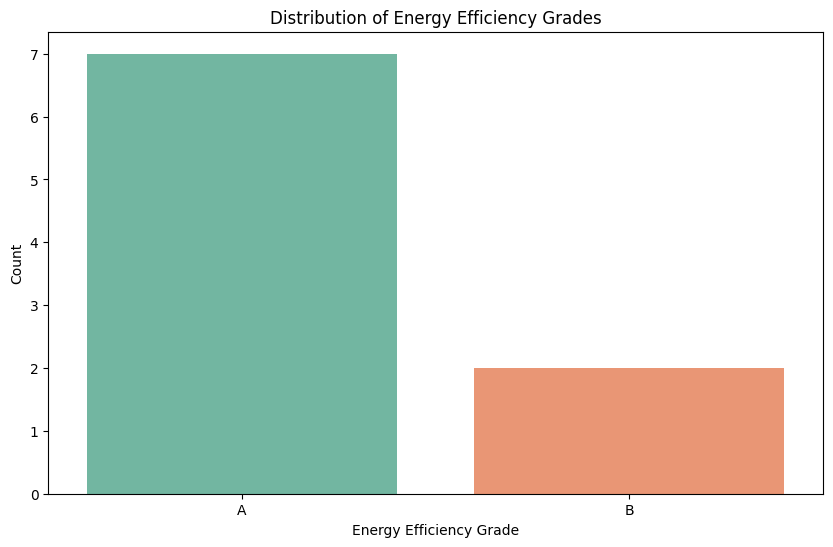

<Figure size 640x480 with 0 Axes>

In [30]:
# Distribution of Energy Efficiency Grades
plt.figure(figsize=(10, 6))
sns.countplot(x='Energy_Efficiency_Grade', data=merged_data, palette='Set2')
plt.title('Distribution of Energy Efficiency Grades')
plt.xlabel('Energy Efficiency Grade')
plt.ylabel('Count')
plt.show()
plt.savefig('new_flile')

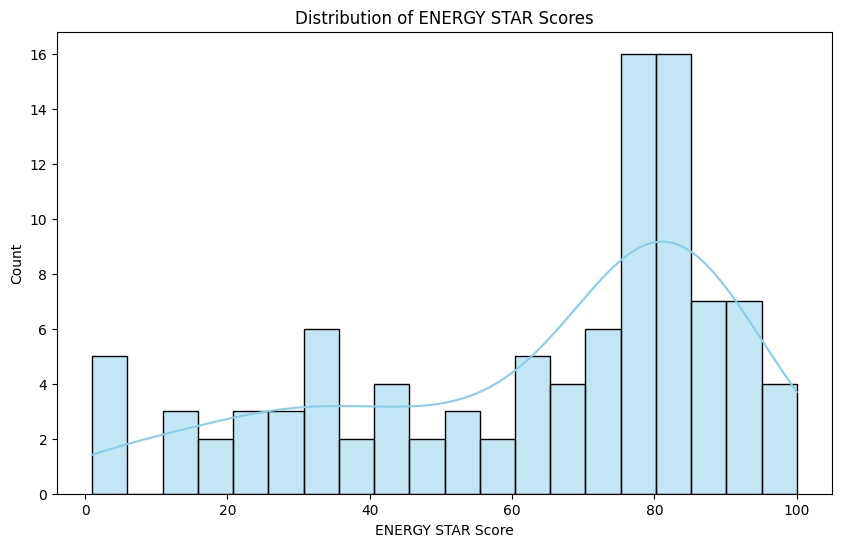

In [14]:
# Distribution of ENERGY STAR Scores
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Energy_Star_1-100_Score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of ENERGY STAR Scores')
plt.xlabel('ENERGY STAR Score')
plt.ylabel('Count')
plt.show()

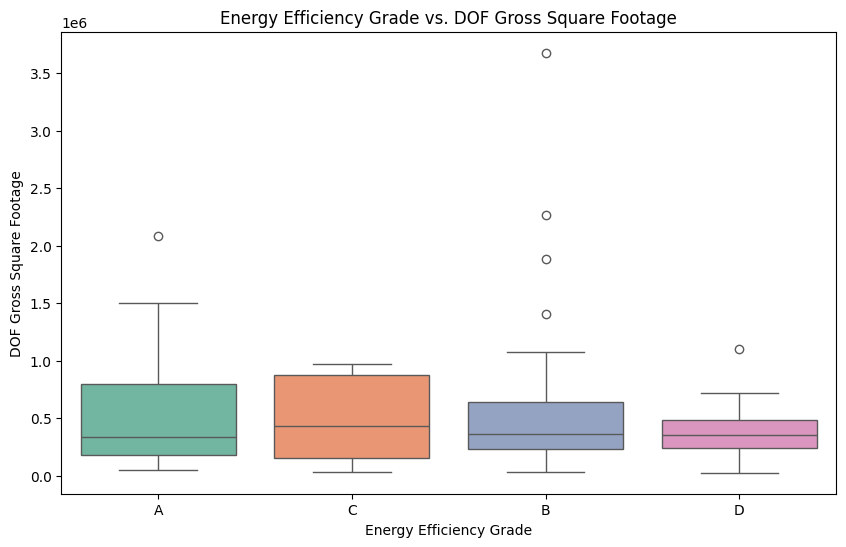

In [16]:
# Box plot of Energy Efficiency Grade vs. DOF Gross Square Footage
plt.figure(figsize=(10, 6))
sns.boxplot(x='Energy_Efficiency_Grade', y='DOF_Gross_Square_Footage', data=merged_data, palette='Set2')
plt.title('Energy Efficiency Grade vs. DOF Gross Square Footage')
plt.xlabel('Energy Efficiency Grade')
plt.ylabel('DOF Gross Square Footage')
plt.show()

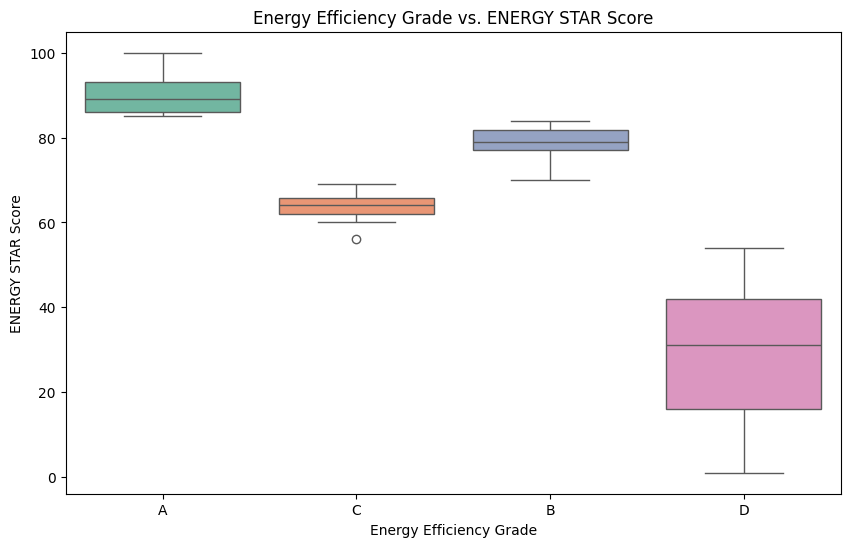

In [17]:
# Box plot of Energy Efficiency Grade vs. ENERGY STAR Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Energy_Efficiency_Grade', y='Energy_Star_1-100_Score', data=merged_data, palette='Set2')
plt.title('Energy Efficiency Grade vs. ENERGY STAR Score')
plt.xlabel('Energy Efficiency Grade')
plt.ylabel('ENERGY STAR Score')
plt.show()

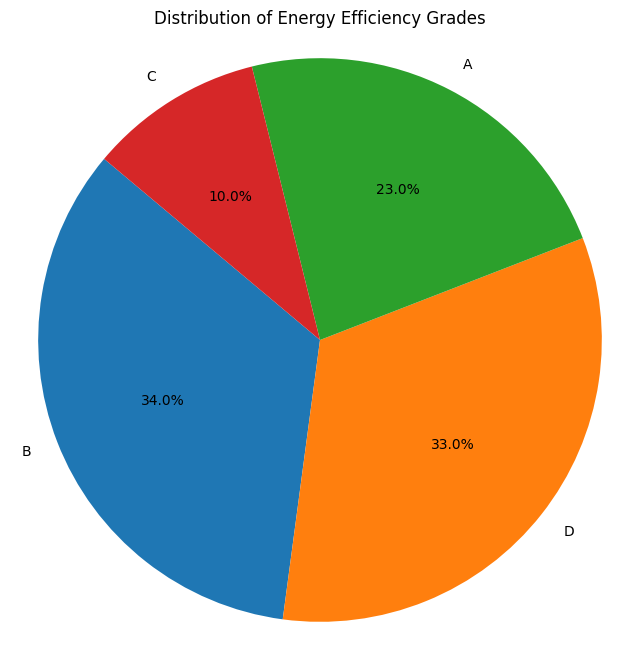

In [18]:
# Pie chart of Energy Efficiency Grades
grade_counts = merged_data['Energy_Efficiency_Grade'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Energy Efficiency Grades')
plt.axis('equal')
plt.show()

In [19]:
# Correlation between numeric features
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_data[numeric_columns].corr()

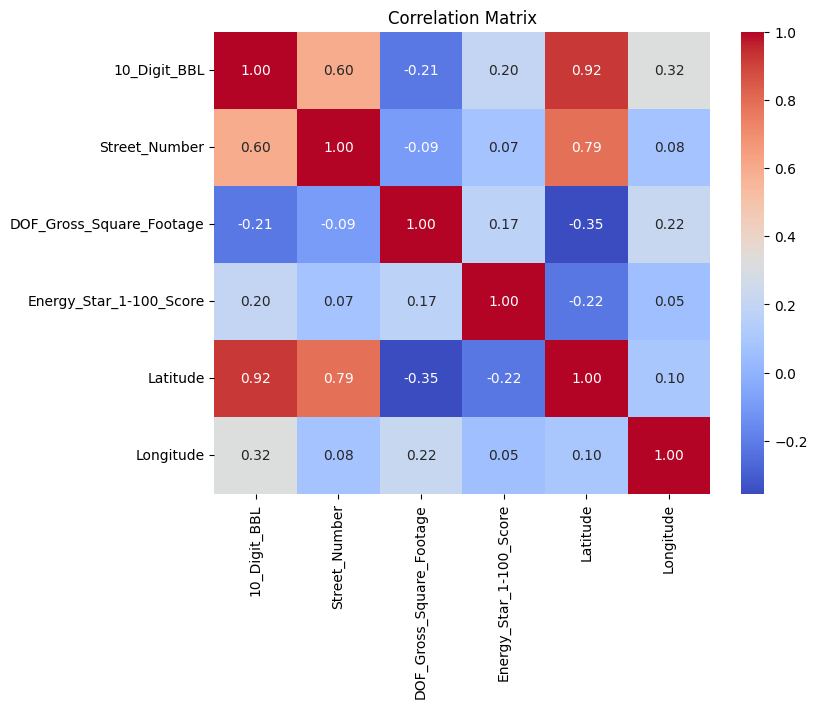

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [21]:
merged_data.dropna(inplace=True)

In [23]:
# Split the data into features (X) and target (y)
X = merged_data[['DOF_Gross_Square_Footage', 'Energy_Star_1-100_Score']]
y = merged_data['Energy_Efficiency_Grade']

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [27]:
# Model Evaluation
y_pred = model.predict(X_test)

# Print Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion Matrix:
[[2]]


In [29]:
def predict_energy_efficiency_grade(square_footage, energy_star_score):
    # Preprocess the input data
    new_data = pd.DataFrame({'DOF_Gross_Square_Footage': [square_footage],
                             'Energy_Star_1-100_Score': [energy_star_score]})
    
    # Make predictions
    prediction = model.predict(new_data)
    
    return prediction[0]

# Example usage
square_footage = 50000
energy_star_score = 70
predicted_grade = predict_energy_efficiency_grade(square_footage, energy_star_score)
print("Predicted Energy Efficiency Grade:", predicted_grade)


Predicted Energy Efficiency Grade: B
